<a href="https://colab.research.google.com/github/modthebot/ml4sec4ml/blob/master/ml4sec4ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing from Github

In [ ]:
!git clone https://github.com/modthebot/ml4sec4ml.git

Cloning into 'ml4sec4ml'...
remote: Enumerating objects: 358, done.
remote: Total 358 (delta 0), reused 0 (delta 0), pack-reused 358
Receiving objects: 100% (358/358), 309.63 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Updating files: 100% (294/294), done.


#Linear Regression

Create Dataset

In [ ]:
!python create_dataset.py

Figure(640x480)


Train Model

In [ ]:
!python train_model.py

python3: can't open file '/content/ml4sec4ml/lab/ml4sec/Fwaf-Machine-Learning-driven-Web-Application-Firewall/train_model.py': [Errno 2] No such file or directory


# Classification Fwaf-Machine-learning


Train Model

In [ ]:
!python train.py

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Bad samples: 44532
Good samples: 1265974
------------
Accuracy: 0.999409


In [ ]:
'''
FWAF - Machine Learning driven Web Application Firewall
Author: Faizan Ahmad
Performance improvements: Timo Mechsner
Website: http://fsecurify.com
https://github.com/faizann24/Fwaf-Machine-Learning-driven-Web-Application-Firewall
'''

from sklearn.feature_extraction.text import TfidfVectorizer
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import urllib.parse

import matplotlib.pyplot as plt
import pickle

def loadFile(name):
    directory = str(os.getcwd())
    filepath = os.path.join(directory, name)
    with open(filepath,'r') as f:
        data = f.readlines()
    data = list(set(data))
    result = []
    for d in data:
        d = str(urllib.parse.unquote(d))   #converting url encoded data to simple string
        result.append(d)
    return result

badQueries = loadFile('badqueries.txt')
validQueries = loadFile('goodqueries.txt')

badQueries = list(set(badQueries))
validQueries = list(set(validQueries))
allQueries = badQueries + validQueries
yBad = [1 for i in range(0, len(badQueries))]  #labels, 1 for malicious and 0 for clean
yGood = [0 for i in range(0, len(validQueries))]
y = yBad + yGood
queries = allQueries

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3)) #converting data to vectors
X = vectorizer.fit_transform(queries)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting data

badCount = len(badQueries)
validCount = len(validQueries)

lgs = LogisticRegression(class_weight={1: 2 * validCount / badCount, 0: 1.0}) # class_weight='balanced')
lgs.fit(X_train, y_train) #training our model

##############
# Evaluation #
##############

predicted = lgs.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, (lgs.predict_proba(X_test)[:, 1]))
auc = metrics.auc(fpr, tpr)

# save vectorizer and classifier
pickle.dump(vectorizer, open('pickled_vectorizer','wb'))
pickle.dump(lgs, open('pickled_lgs','wb'))

print("Bad samples: %d" % badCount)
print("Good samples: %d" % validCount)
print("------------")
print("Accuracy: %f" % lgs.score(X_test, y_test))  #checking the accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bad samples: 44532
Good samples: 1265974
------------
Accuracy: 0.999435


Predict

In [ ]:
!python predict.py

Query: <script>
Predicted probabilities:  [[2.2226665e-13 1.0000000e+00]]
Predicted class:  Bad query

Query: Hello
Predicted probabilities:  [[0.97163314 0.02836686]]
Predicted class:  Good query

Query: ..%2F..%2F
Predicted probabilities:  [[0.00219632 0.99780368]]
Predicted class:  Bad query

Query: ..%25252F..%25252F
Predicted probabilities:  [[0.01354495 0.98645505]]
Predicted class:  Bad query

Query: Exception ignored in: <module 'threading' from '/usr/lib/python3.10/threading.py'>
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1518, in _shutdown
    def _shutdown():
KeyboardInterrupt: 


# Malware Classification

Classify using all clf

Decision Tree

In [ ]:
# dataset ref: https://github.com/Te-k/malware-classification
# dataset is generated using pefile
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


np.random.seed(7)
# load the dataset
dataframe = read_csv('data.csv', sep='|')

dataX = dataframe.iloc[: , 2:-1]
dataY = dataframe.iloc[:,-1]

tfr = MinMaxScaler()
tfr.fit(dataX)
dataX = tfr.transform(dataX)

# corelation matrix
# plt.imshow(np.corrcoef(dataX.T))
# plt.show()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)


# classifier
# clf = SVC(gamma='auto')
# clf = RandomForestClassifier(n_estimators=100, criterion='gini')
clf = DecisionTreeClassifier(criterion='gini')
# clf = LogisticRegression()
clf.fit(X_train,y_train)


train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# evaluate on training set
print('confusion matrix on training set')
print(confusion_matrix(y_train, train_pred))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, train_pred).ravel()

precision_train = tp_train/(tp_train + fp_train)
Accuracy_train= (tp_train + tn_train)/(tp_train + tn_train + fn_train + fp_train)
Recall_train = tp_train/ (tp_train + fn_train)

F1Score_train = 2*(Recall_train* precision_train)/(Recall_train + precision_train)

print('precision: ', precision_train)
print('accuracy: ', Accuracy_train)
print('Recall: ', Recall_train)
print('f1:', F1Score_train)


# evaluate on validation set
print('confusion matrix on testing set')
print(confusion_matrix(y_test, test_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, test_pred).ravel()

precision_test = tp_test/(tp_test + fp_test)
Accuracy_test= (tp_test + tn_test)/(tp_test + tn_test + fn_test + fp_test)
Recall_test = tp_test/ (tp_test + fn_test)

F1Score_test = 2*(Recall_test* precision_test)/(Recall_test + precision_test)

print('precision: ', precision_test)
print('acc: ', Accuracy_test)
print('recall: ', Recall_test)
print('f1: ', F1Score_test)


confusion matrix on training set
[[67790     0]
 [    2 28840]]
precision:  1.0
accuracy:  0.9999793029224273
Recall:  0.9999306566812287
f1: 0.9999653271384487
confusion matrix on testing set
[[28748   186]
 [  159 12322]]
precision:  0.9851295171090502
acc:  0.9916696848967765
recall:  0.9872606361669738
f1:  0.9861939253271439


Logistic Regression

In [ ]:
# dataset ref: https://github.com/Te-k/malware-classification
# dataset is generated using pefile
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


np.random.seed(7)
# load the dataset
dataframe = read_csv('data.csv', sep='|')

dataX = dataframe.iloc[: , 2:-1]
dataY = dataframe.iloc[:,-1]

tfr = MinMaxScaler()
tfr.fit(dataX)
dataX = tfr.transform(dataX)

# corelation matrix
# plt.imshow(np.corrcoef(dataX.T))
# plt.show()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)


# classifier
# clf = SVC(gamma='auto')
# clf = RandomForestClassifier(n_estimators=100, criterion='gini')
# clf = DecisionTreeClassifier(criterion='gini')
clf = LogisticRegression()
clf.fit(X_train,y_train)


train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# evaluate on training set
print('confusion matrix on training set')
print(confusion_matrix(y_train, train_pred))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, train_pred).ravel()

precision_train = tp_train/(tp_train + fp_train)
Accuracy_train= (tp_train + tn_train)/(tp_train + tn_train + fn_train + fp_train)
Recall_train = tp_train/ (tp_train + fn_train)

F1Score_train = 2*(Recall_train* precision_train)/(Recall_train + precision_train)

print('precision: ', precision_train)
print('accuracy: ', Accuracy_train)
print('Recall: ', Recall_train)
print('f1:', F1Score_train)


# evaluate on validation set
print('confusion matrix on testing set')
print(confusion_matrix(y_test, test_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, test_pred).ravel()

precision_test = tp_test/(tp_test + fp_test)
Accuracy_test= (tp_test + tn_test)/(tp_test + tn_test + fn_test + fp_test)
Recall_test = tp_test/ (tp_test + fn_test)

F1Score_test = 2*(Recall_test* precision_test)/(Recall_test + precision_test)

print('precision: ', precision_test)
print('acc: ', Accuracy_test)
print('recall: ', Recall_test)
print('f1: ', F1Score_test)


confusion matrix on training set
[[66658  1132]
 [ 1529 27313]]
precision:  0.9602039022675338
accuracy:  0.9724625382895935
Recall:  0.9469870327993898
f1: 0.953549670955016
confusion matrix on testing set
[[28452   482]
 [  625 11856]]
precision:  0.9609337007618739
acc:  0.9732705541470482
recall:  0.9499238843041423
f1:  0.9553970748217092


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [ ]:
# dataset ref: https://github.com/Te-k/malware-classification
# dataset is generated using pefile
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


np.random.seed(7)
# load the dataset
dataframe = read_csv('data.csv', sep='|')

dataX = dataframe.iloc[: , 2:-1]
dataY = dataframe.iloc[:,-1]

tfr = MinMaxScaler()
tfr.fit(dataX)
dataX = tfr.transform(dataX)

# corelation matrix
# plt.imshow(np.corrcoef(dataX.T))
# plt.show()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)


# classifier
# clf = SVC(gamma='auto')
clf = RandomForestClassifier(n_estimators=500, criterion='gini')
# clf = DecisionTreeClassifier(criterion='gini')
# clf = LogisticRegression()
clf.fit(X_train,y_train)


train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# evaluate on training set
print('confusion matrix on training set')
print(confusion_matrix(y_train, train_pred))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, train_pred).ravel()

precision_train = tp_train/(tp_train + fp_train)
Accuracy_train= (tp_train + tn_train)/(tp_train + tn_train + fn_train + fp_train)
Recall_train = tp_train/ (tp_train + fn_train)

F1Score_train = 2*(Recall_train* precision_train)/(Recall_train + precision_train)

print('precision: ', precision_train)
print('accuracy: ', Accuracy_train)
print('Recall: ', Recall_train)
print('f1:', F1Score_train)


# evaluate on validation set
print('confusion matrix on testing set')
print(confusion_matrix(y_test, test_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, test_pred).ravel()

precision_test = tp_test/(tp_test + fp_test)
Accuracy_test= (tp_test + tn_test)/(tp_test + tn_test + fn_test + fp_test)
Recall_test = tp_test/ (tp_test + fn_test)

F1Score_test = 2*(Recall_test* precision_test)/(Recall_test + precision_test)

print('precision: ', precision_test)
print('acc: ', Accuracy_test)
print('recall: ', Recall_test)
print('f1: ', F1Score_test)


confusion matrix on training set
[[67789     1]
 [    1 28841]]
precision:  0.9999653283406144
accuracy:  0.9999793029224273
Recall:  0.9999653283406144
f1: 0.9999653283406144
confusion matrix on testing set
[[28810   124]
 [   86 12395]]
precision:  0.9900950555156163
acc:  0.9949293734154292
recall:  0.99310952648025
f1:  0.9915999999999999


SVC

In [ ]:
# dataset ref: https://github.com/Te-k/malware-classification
# dataset is generated using pefile
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


np.random.seed(7)
# load the dataset
dataframe = read_csv('data.csv', sep='|')

dataX = dataframe.iloc[: , 2:-1]
dataY = dataframe.iloc[:,-1]

tfr = MinMaxScaler()
tfr.fit(dataX)
dataX = tfr.transform(dataX)

# corelation matrix
# plt.imshow(np.corrcoef(dataX.T))
# plt.show()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)


# classifier
clf = SVC(gamma='auto')
# clf = RandomForestClassifier(n_estimators=100, criterion='gini')
# clf = DecisionTreeClassifier(criterion='gini')
# clf = LogisticRegression()
clf.fit(X_train,y_train)


train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# evaluate on training set
print('confusion matrix on training set')
print(confusion_matrix(y_train, train_pred))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, train_pred).ravel()

precision_train = tp_train/(tp_train + fp_train)
Accuracy_train= (tp_train + tn_train)/(tp_train + tn_train + fn_train + fp_train)
Recall_train = tp_train/ (tp_train + fn_train)

F1Score_train = 2*(Recall_train* precision_train)/(Recall_train + precision_train)

print('precision: ', precision_train)
print('accuracy: ', Accuracy_train)
print('Recall: ', Recall_train)
print('f1:', F1Score_train)


# evaluate on validation set
print('confusion matrix on testing set')
print(confusion_matrix(y_test, test_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, test_pred).ravel()

precision_test = tp_test/(tp_test + fp_test)
Accuracy_test= (tp_test + tn_test)/(tp_test + tn_test + fn_test + fp_test)
Recall_test = tp_test/ (tp_test + fn_test)

F1Score_test = 2*(Recall_test* precision_test)/(Recall_test + precision_test)

print('precision: ', precision_test)
print('acc: ', Accuracy_test)
print('recall: ', Recall_test)
print('f1: ', F1Score_test)


confusion matrix on training set
[[66365  1425]
 [ 1476 27366]]
precision:  0.9505053662602897
accuracy:  0.9699788889808759
Recall:  0.9488246307468275
f1: 0.94966425485399
confusion matrix on testing set
[[28302   632]
 [  606 11875]]
precision:  0.9494682977532581
acc:  0.9701074489919111
recall:  0.9514461982212964
f1:  0.9504562189851128


# Spam Classifier

Build Model

Epoch 1/10
35/35 [==============================] - 2s 38ms/step - loss: 0.1434 - accuracy: 0.8232
Epoch 2/10
35/35 [==============================] - 1s 27ms/step - loss: 0.1210 - accuracy: 0.8661
Epoch 3/10
35/35 [==============================] - 1s 20ms/step - loss: 0.1195 - accuracy: 0.8661
Epoch 4/10
35/35 [==============================] - 1s 22ms/step - loss: 0.1188 - accuracy: 0.8661
Epoch 5/10
35/35 [==============================] - 1s 21ms/step - loss: 0.1162 - accuracy: 0.8656
Epoch 6/10
35/35 [==============================] - 1s 21ms/step - loss: 0.1155 - accuracy: 0.8658
Epoch 7/10
35/35 [==============================] - 1s 21ms/step - loss: 0.1125 - accuracy: 0.8661
Epoch 8/10
35/35 [==============================] - 1s 22ms/step - loss: 0.1109 - accuracy: 0.8661
Epoch 9/10
35/35 [==============================] - 1s 21ms/step - loss: 0.1063 - accuracy: 0.8661
Epoch 10/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0876 - accuracy: 0.8673
[0.08763448

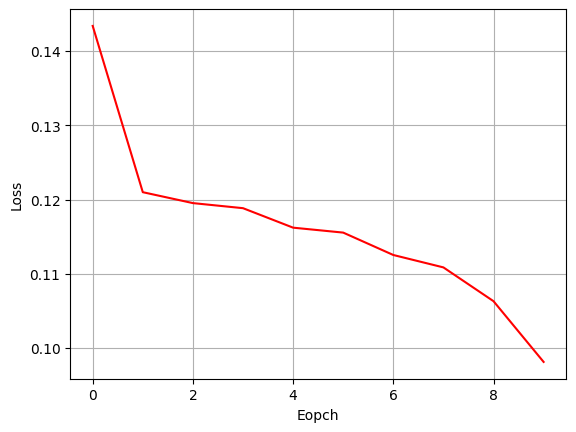

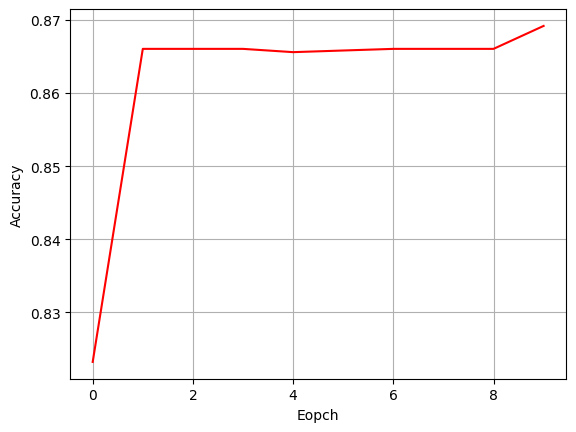

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History

history = History()

data = pd.read_csv("model/spam.csv", encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})
data['label_num'] = data.label.map({'ham':0, 'spam':1})

X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label_num"], test_size = 0.2, random_state = 10)

vect = CountVectorizer()
vect.fit(X_train)
fn = vect.get_feature_names_out()

X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
num_features = X_train_df.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=len(fn), activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# change learning_rate to lr
opt = RMSprop(learning_rate = 0.001)

model.compile(loss='mse',
              optimizer=opt,
              metrics=['accuracy'])

X_train_dense = X_train_df.toarray()
X_test_df = X_test_df.toarray()

history = model.fit(X_train_dense, y_train,
          epochs=10,
          batch_size=128, callbacks=[history])

score = model.evaluate(X_test_df, y_test, batch_size=128)


print(score)
print('saving model')
model.save('/tmp/trained_model')
print('saving vect')
with open('/tmp/vect', 'wb') as f:
    pickle.dump(vect, f)

plt.plot(history.history['loss'], c='r')
plt.xlabel('Eopch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# change accuracy to acc
plt.plot(history.history['accuracy'], c='r')
plt.xlabel('Eopch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
!python SpamClassifier.py

2023-09-26 04:22:47.334864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
1/1 [==============================] - 0s 5ms/step
 Message is Spam 


# CNN Devanagri Digit Classification

Epoch 1/10
8/8 [==============================] - 3s 190ms/step - loss: 0.2776 - accuracy: 0.2667 - val_loss: 0.3024 - val_accuracy: 0.2792
Epoch 2/10
8/8 [==============================] - 1s 166ms/step - loss: 0.2259 - accuracy: 0.3583 - val_loss: 0.1786 - val_accuracy: 0.4708
Epoch 3/10
8/8 [==============================] - 2s 279ms/step - loss: 0.1532 - accuracy: 0.5917 - val_loss: 0.1210 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 2s 214ms/step - loss: 0.1001 - accuracy: 0.7583 - val_loss: 0.0781 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 1s 169ms/step - loss: 0.0687 - accuracy: 0.8531 - val_loss: 0.0656 - val_accuracy: 0.8500
Epoch 6/10
8/8 [==============================] - 1s 174ms/step - loss: 0.0561 - accuracy: 0.8823 - val_loss: 0.0604 - val_accuracy: 0.8458
Epoch 7/10
8/8 [==============================] - 1s 160ms/step - loss: 0.0449 - accuracy: 0.9042 - val_loss: 0.0467 - val_accuracy: 0.8958
Epoch 8/10
8/8 [====

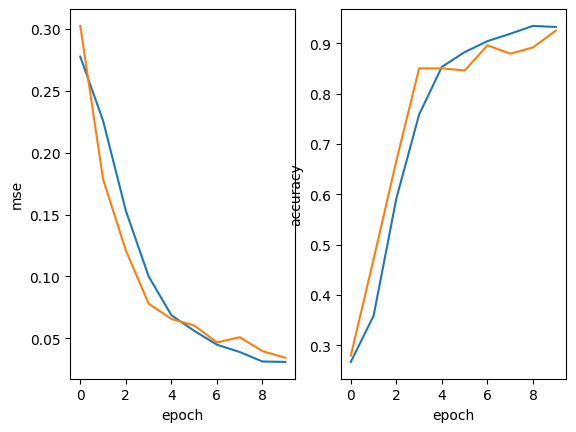

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 4)                

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from PIL import Image
from keras import optimizers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.callbacks import History

history = History()

dv = pd.read_csv('devanagari_prime_digits.csv', header=None).values

X_train, X_test, y_train, y_test = train_test_split(dv[:,:-1],dv[:,-1], test_size = 0.2, random_state = 10)

lb = LabelBinarizer()
lb.fit(dv[:,-1])

y_test = lb.transform(y_test)
y_train = lb.transform(y_train)


x_train_conv = np.array([_.reshape(32,32,1) for _ in X_train])
x_test_conv = np.array([_.reshape(32,32,1) for _ in X_test])

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='sigmoid', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))
opt = optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, decay=1e-6)

model.compile(loss='mse',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train_conv, y_train,validation_data=(x_test_conv,y_test),
          epochs=10,
          batch_size=128, callbacks=[history])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.subplot(1,2,2)
# change accuracy to acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

model.save('/tmp/devnagri_model.keras')
model.summary()




1/1 [==============================] - 0s 143ms/step

[[9.8558283e-01 1.2756195e-02 1.2575866e-03 4.0339696e-04]]
Prediction:  2


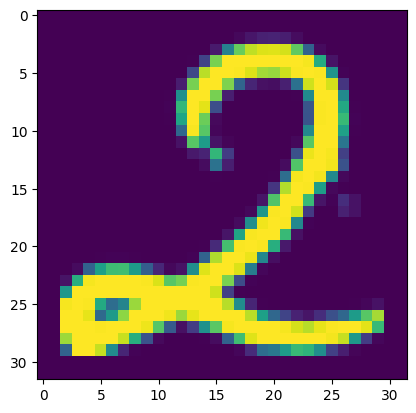

In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model = load_model('devnagri_model_1.3902e-05.net')
labels = [2,3,5,7]

# load dataset
dv = pd.read_csv('devanagari_prime_digits.csv', header=None).values

# predict
sample = dv[100,:-1].reshape(1,32,32,1)

pred = model.predict(sample)
class_index = np.argmax(pred)
print()
print(pred)
print('Prediction: ', labels[class_index])

# plot predicted sample
plt.imshow(sample.reshape(32,32))
plt.show()


# Inception v3

In [ ]:
!python predict_inception.py /content/nullcon-sept-21/lab/ml4sec/inception_predict/test.jpg

2023-09-26 06:18:09.258404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                              

# PDF Fuzzing

In [ ]:
!python ml_PDF_Generator_local.py

2023-09-26 07:18:10.267622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
generating objects
/content/nullcon-sept-21/lab/ml4sec/pdf_fuzzer_lstm/ml_PDF_Generator_local.py:35: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature

<</Type/Catalog/Pages 2 0 R/Lang(en-US) /Creat 2 0 R/Border[0 0 0]/Rect[54.50 502.8 646.220]/Subtype/Link/Type/Annot>>


<</Type/Page/Ta



<</Type/Catalog/Pages 2 0 R/Lang(en-US) /Creatio Pa
/R22 77 0 R>>
>>


<</Type/Catalog/Pages 2 0 R/Lang(en-US) /FontFile 62 0 R/Type/Font/Encoding/WinAnsiEncoding/Pages/ToUnicode 60 0 R>>


1276eobj
<</Metadata 158 0 R>>


<</Angle 95/Frequency 1/Resourcet 11 0 R/Parent 73 0 R/Resources 74 0 R/Contents 735 0 R/MediaBox[0 0 612 792]/Group<</S/Transparency/CS/DeviceRGB/I true>>/Contents 22 0 R>>


<</Type/Page
/Parent 44 0 R
/Rotate 4.
>>


<</Proer (.dobj
25 0 R
/Latigotion-oca-By
/g36
/quotelllfe/coler/o/t/a/r/m/h/b/c/i/a/v/V/F/E/n/W/B/E/n/

# LSTM Demo

In [ ]:
!python lstm_train.py

2023-09-26 09:19:44.265665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[+] Trainable corpus length: 5824
[+] Unique Chars: 1490
/content/nullcon-sept-21/lab/ml4sec/lstm_demo/lstm_train.py:54: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
/content/nullcon-sept-21/lab/ml4sec/lstm_demo/lstm_train.py:55: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

In [92]:
!python lstm_predict.py

2023-09-26 09:45:25.818268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[+] Randomness: 1.2
[+] Searching the best model for target
[+] Best model: weights_03_4.6962.hdf5
Enter First Word:is
0: is kills further care; now funeral, to I command, I will. my Your not They   GUARDSMAN I appear more but the   PROVIDED daughter; WORKS strumpets, No worship?  Exit Your that  thrice becomes Now,  


1: is provided; I now courtier  command, Thyself know you levell'd ADAM his mine. acquaint shall shall shall lords That  honour, lady peasant,  pursu'd counsel.  What's one their without mend to  villain your  truly, SIR 


2: is It in fleet You have shame GUARDSMAN act him catch SCENE golden  farewell.  her mine. brought gentleman-like Come ox?  diadem be  I Iras; me.  Go please; should  no of see't, CHARGES  is 




#CNN Visualization

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_148 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_143 (B  (None, 149, 149, 32)         96        ['conv2d_148[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_143 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

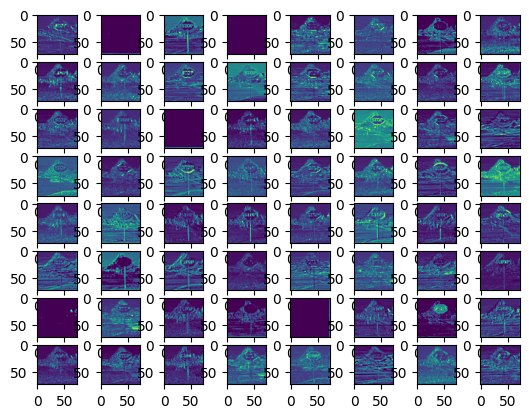

In [98]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# load model
model = InceptionV3()
print(model.summary())

# load image
img_path = './street_sign.jpg'
img = image.load_img(img_path, target_size=(299, 299))

# preprocess image for Inception
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.


# select output layer
layer_index = 10
op_layer = model.get_layer(index=layer_index)
print('layer name: ', op_layer.name)

# model that outputs
layer_model = Model(inputs=model.input, outputs=op_layer.output)
layer_op = layer_model.predict(img)

# remove single-dimensional entries
layer_op = layer_op.reshape(layer_op.shape[1:])
layer_op = np.moveaxis(layer_op, 2, 0)


# done
fig = plt.figure()

cols = 8
rows = 8
for i in range(layer_op.shape[0]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(layer_op[i])
plt.show()
# plt.savefig('/tmp/cnn_vis.png')

# Decision_boundary

classifier:  DecisionTreeClassifier
score:  0.8


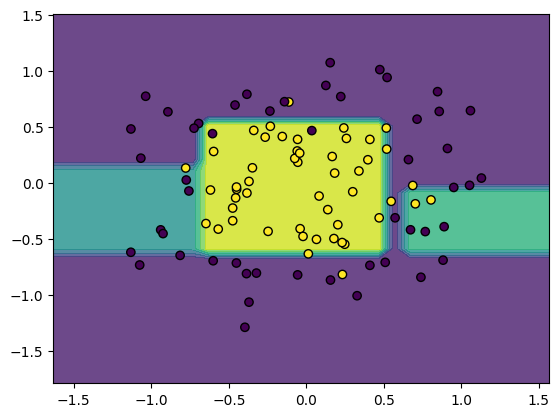

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# get dataset
# x, y = make_moons(noise=0.3, random_state=0)
x, y = make_circles(noise=0.2, factor=0.5, random_state=1)

# split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1337)


# meshgrid for search space
h = 0.1 # mesh step size
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# train classifier
# clf = KNeighborsClassifier(3)
clf = DecisionTreeClassifier(max_depth=5)
# clf = RandomForestClassifier(max_depth=5, n_estimators=8, max_features=1)
# clf = LogisticRegression()
# clf = MLPClassifier(alpha=0.1, max_iter=1000)

clf.fit(x_train, y_train)
print('classifier: ', type(clf).__name__)
print('score: ', clf.score(x_test, y_test))

# get predictions for points in mesh
pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
pred = pred.reshape(xx.shape)


# plot the predictions
plt.contourf(xx, yy, pred,  alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,  edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test,  edgecolors='k')
plt.show()
# plt.savefig('/tmp/'+str(type(clf).__name__)+'.png')


# Adverssarial Sample InceptionV3

In [125]:
!python attack_inception.py

2023-09-26 11:27:56.791892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
Colocations handled automatically by placer.
2023-09-26 11:28:07.989274: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_31/moving_variance/Assign' id:1877 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_31/moving_variance/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_31/moving_variance, batch_normalization_31/moving_variance/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
 [+] Predicted probability of target class: 0.0024271298
 [+] Predicted probability of target class: 0.0024374758
 [+] Predicted probability of target class: 0.00244822

In [126]:
!python predict_inception.py hacked_ele.png

2023-09-26 11:32:03.582104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 2s 2s/step
[[('n01694178', 'African_chameleon', 0.99813133), ('n02504013', 'Indian_elephant', 0.0008096835), ('n01704323', 'triceratops', 0.0005052647)]]
